In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('amazon_sales_report.csv')

In [3]:
df.shape

(128976, 21)

In [4]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [5]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [7]:
df.drop(['New','PendingS'], axis = 1, inplace = True)    #dropping null columns permanently

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [9]:
pd.isnull(df).sum()                 #checking null values

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [10]:
df.dropna(inplace = True)          #dropping null values

In [11]:
df.shape

(37514, 19)

In [12]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [13]:
df['ship-postal-code'] = df['ship-postal-code'].astype('int')      #changing data type

In [14]:
df['ship-postal-code'].dtype

dtype('int32')

In [15]:
df['Date'] = pd.to_datetime(df['Date'])

In [16]:
df.rename(columns={'Qty':'Quantity'})             #rename column

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Quantity,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081,IN,False,Easy Ship
1,1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085,IN,False,Easy Ship
3,3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008,IN,False,Easy Ship
7,7,406-7807733-3785945,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,S,Shipped,1,INR,399.00,HYDERABAD,TELANGANA,500032,IN,False,Easy Ship
12,12,405-5513694-8146768,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,XS,Shipped,1,INR,399.00,Amravati.,MAHARASHTRA,444606,IN,False,Easy Ship
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128875,128874,405-4724097-1016369,2022-06-01,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,S,Shipped,1,INR,854.00,ALLUR,ANDHRA PRADESH,524315,IN,False,Easy Ship
128876,128875,403-9524128-9243508,2022-06-01,Cancelled,Merchant,Amazon.in,Standard,Blazzer,XL,On the Way,0,INR,734.29,Barabanki,UTTAR PRADESH,225001,IN,False,Easy Ship
128888,128887,405-6493630-8542756,2022-05-31,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Trousers,M,Shipped,1,INR,518.00,NOIDA,UTTAR PRADESH,201301,IN,False,Easy Ship
128891,128890,407-0116398-1810752,2022-05-31,Cancelled,Merchant,Amazon.in,Standard,Wallet,Free,On the Way,0,INR,398.10,MADURAI,TAMIL NADU,625007,IN,False,Easy Ship


In [17]:
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,37514.000000,37514,37514.000000,37514.000000,37514.000000
mean,60953.809858,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,27235.250000,2022-04-20 00:00:00,1.000000,458.000000,370465.000000
50%,63470.500000,2022-05-09 00:00:00,1.000000,629.000000,500019.000000
75%,91790.750000,2022-06-01 00:00:00,1.000000,771.000000,600042.000000
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,989898.000000
std,36844.853039,NaN,0.354160,279.952414,194550.425637


In [18]:
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [19]:
df[['Qty','Amount']].describe()

,Qty,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


# EXPLORATORY DATA ANALYSIS

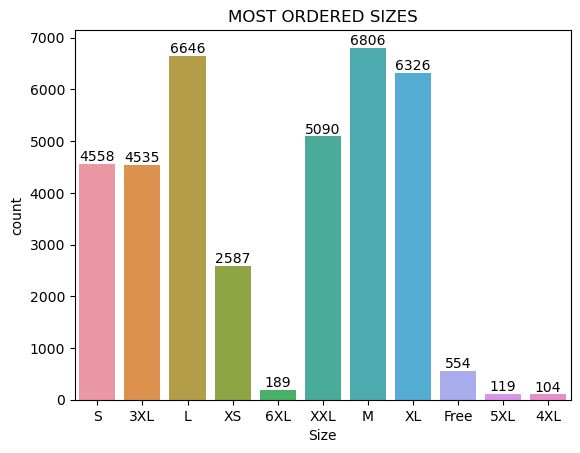

In [49]:
a = sns.countplot(x='Size', data = df)
plt.title('MOST ORDERED SIZES')

for i in a.containers :
    a.bar_label(i)

In [21]:
b = df.groupby(['Size'], as_index = False )['Qty'].sum().sort_values(by='Qty',ascending=False)

In [22]:
b

,Size,Qty
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


### ------>  MOST OF THE PEOPLE BUYS M-SIZE & L-SIZE

# COURIER STATUS

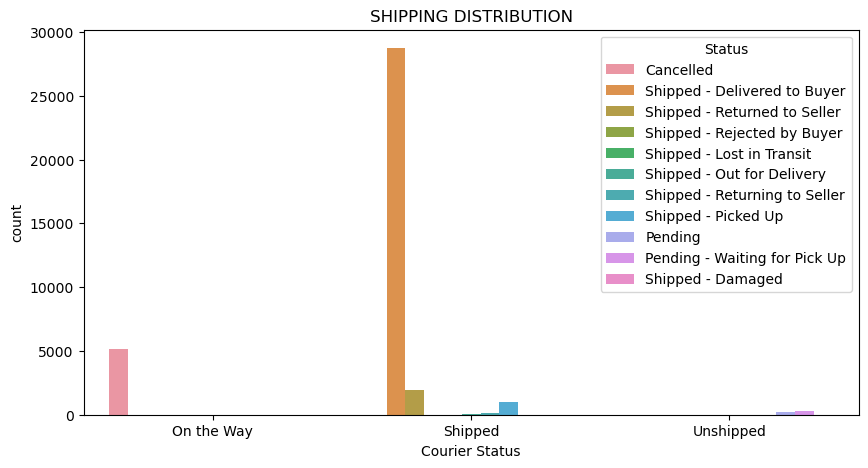

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(data = df, x = 'Courier Status', hue = 'Status')
plt.title('SHIPPING DISTRIBUTION')
plt.show()

### -------> MAJORITY OF THE ORDERS ARE SHIPPED

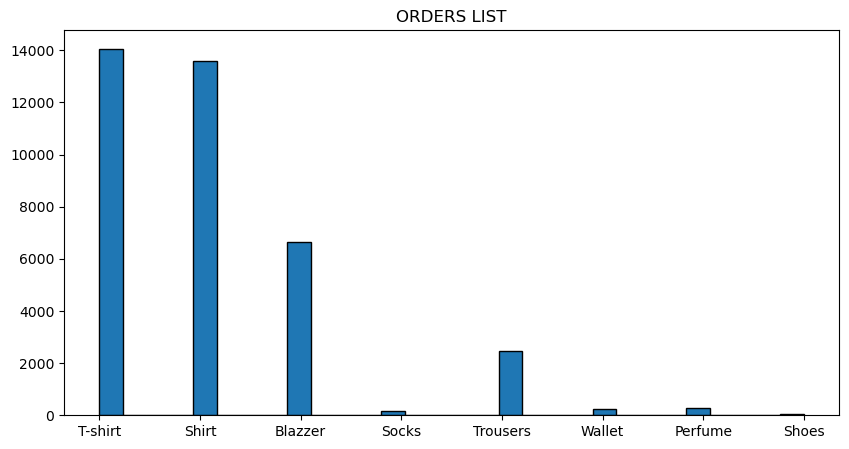

In [51]:
df['Category'] = df['Category'].astype(str)
column_data = df['Category']
plt.figure(figsize=(10,5))
plt.hist(column_data, bins=30, edgecolor='Black')
plt.title('ORDERS LIST')
plt.show()

### ---------- MOST OF BUYERS BOUGHT T-SHIRTS AND SHIRTS

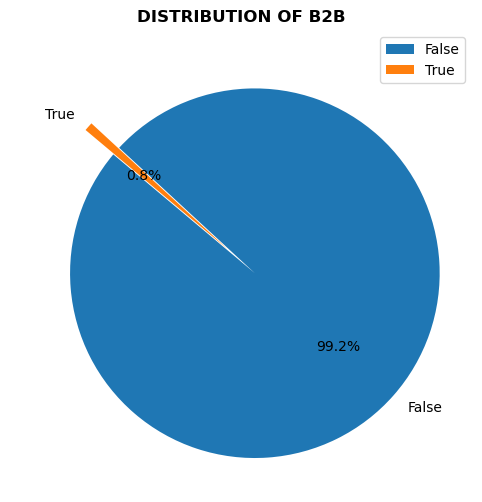

In [54]:
b2b = df['B2B'].value_counts()


plt.figure(figsize=(8, 6))
exp = [0.1,0.1]
plt.pie(b2b,explode=exp, labels=b2b.index, autopct='%1.1f%%', startangle=140)
plt.title('DISTRIBUTION OF B2B', weight ='bold')
plt.legend()
plt.show()

### ----------------> 99.2 % ARE RETAILERS AND 0.8% ARE B2B BUYER

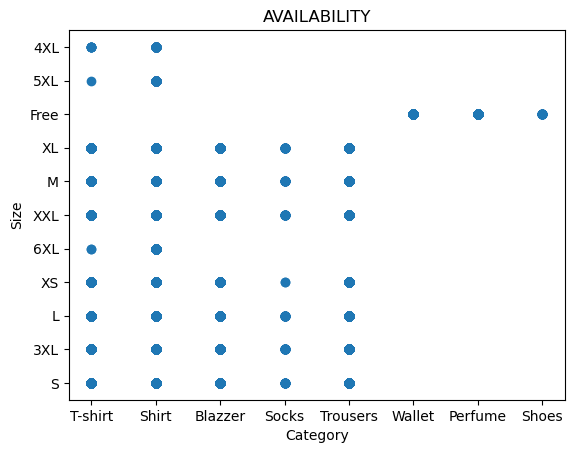

In [55]:
x_data = df['Category']
y_data = df['Size']

plt.scatter(x_data, y_data)
plt.title('AVAILABILITY')
plt.xlabel('Category')
plt.ylabel('Size')
plt.show()

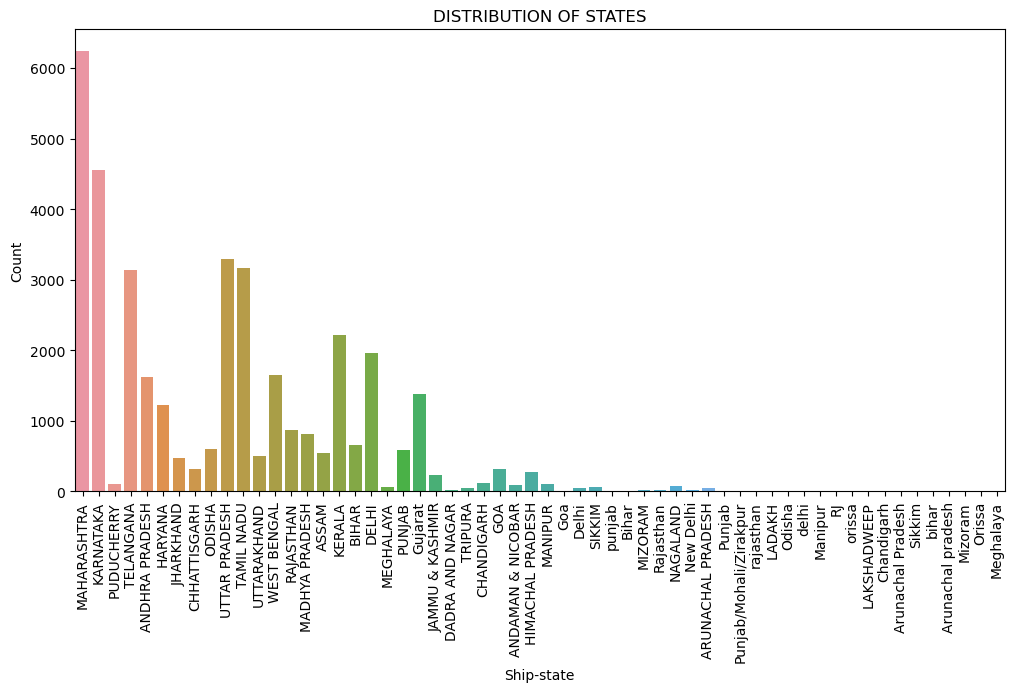

In [56]:


plt.figure(figsize=(12,6))
sns.countplot(data=df, x='ship-state')
plt.title('DISTRIBUTION OF STATES')
plt.xlabel('Ship-state')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

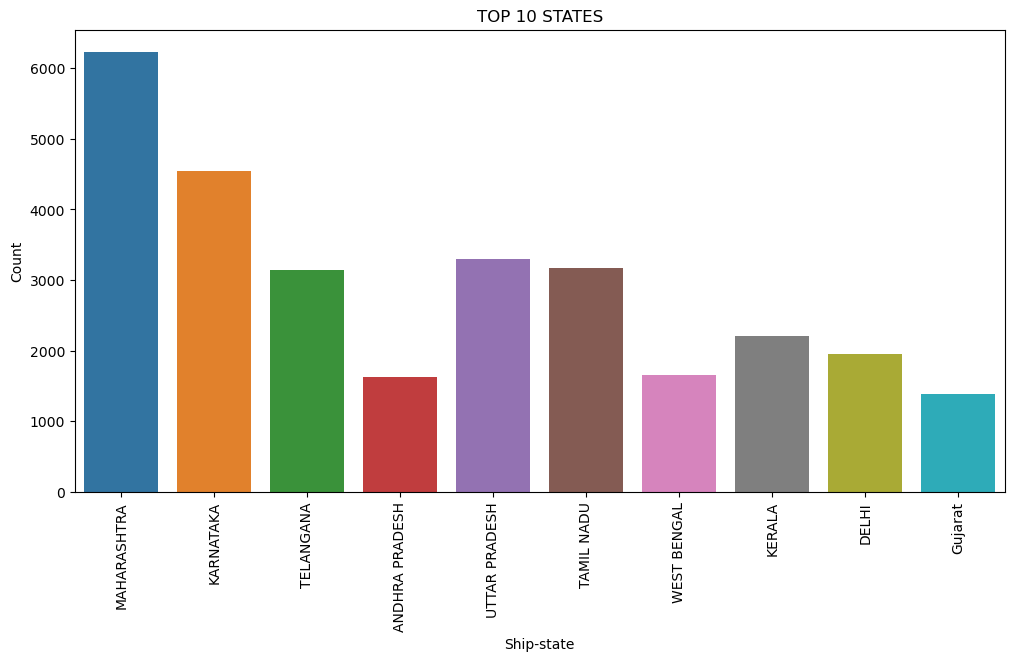

In [57]:
top_10 = df['ship-state'].value_counts().head(10)


plt.figure(figsize=(12,6))
sns.countplot(data=df[df['ship-state'].isin(top_10.index)], x='ship-state')
plt.title('TOP 10 STATES')
plt.xlabel('Ship-state')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

### ------------> MOST BUYERS FROM MAHARASHTRA

# CONCLUSION

#### THE DATA ANALASIS REVEALS THAT THE BUSINESS HAS A SIGNIFICANT CUSTOMER BASE IN MAHARASHTRA STATE , MAINLY SERVES RETAILERS THROUGH AMAZON, EXPERIENCES HIGH DEMAND FOR T-SHIRTS, AND M-SIZE IS THE PREFERRED CHOICE AMONG BUYERS
